## Preparation

Все нужные либы и проверка в какой директории работаем

Эту ячеку надо выполнять только в первый раз для установки всех либ. Лучше создать env

In [1]:
!pip3 install numpy
!pip3 install matplotlib
!pip3 install pandas
!pip3 install xlsxwriter
!pip3 install IPython
!pip3 install openpyxl

from IPython.display import clear_output
clear_output() # если что-то не работает, уберите эту строчку и смотрите на ошибки

Импорт всех либ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import xlsxwriter
os.getcwd()

'/Users/kirilllalayants/Desktop/физика/lab3.02'

Создание эксель файла, в котором потом все сохраним


In [4]:
NAME_OF_EXCEL = 'data_ready.xlsx'
if not os.path.exists(NAME_OF_EXCEL):
    xlsxwriter.Workbook(NAME_OF_EXCEL).close()
data = pd.read_excel(NAME_OF_EXCEL)  
data

,R,"I, mA","U, В","Pr, мВт",dPr,"Ps, мВт",dPs,"P, мВт",dP,eta,deta
0,100,14.10,0.74,10.4340,0.047065,134.413502,0.217263,144.833430,0.124923,0.072041,0.007021
1,200,12.12,2.07,25.0884,0.040985,99.313871,0.162938,124.495118,0.108797,0.201521,0.019621
2,300,10.84,2.94,31.8696,0.037439,79.444390,0.132159,111.347119,0.098505,0.286218,0.027866
3,400,9.74,3.69,35.9406,0.034719,64.139059,0.108424,100.048057,0.089776,0.359233,0.034974
4,500,8.73,4.37,38.1501,0.032542,51.526798,0.088834,89.673464,0.081886,0.425434,0.041419
5,600,8.01,4.86,38.9286,0.031230,43.378018,0.076151,82.277714,0.076357,0.473137,0.046063
6,700,7.33,5.32,38.9956,0.030190,36.325585,0.065147,75.292840,0.071225,0.517919,0.050422
7,800,6.71,5.74,38.5154,0.029434,30.440355,0.055933,68.924277,0.066641,0.558807,0.054403
8,900,6.28,6.03,37.8684,0.029021,26.663918,0.049998,64.507371,0.063526,0.587040,0.057151
9,1000,5.92,6.27,37.1184,0.028744,23.694529,0.045314,60.809497,0.060965,0.610405,0.059426


Все нужные колонки в np.array

In [7]:
# I = data["I, mA"].to_numpy() 
# U = data["U, В"].to_numpy()
# R = data["R"].to_numpy()

I = np.array([14.1, 12.12, 10.84, 9.74, 8.73, 8.01, 7.33, 6.71, 6.28, 5.92, 5.56, 5.25, 4.96, 4.66, 4.55])
U = np.array([0.74, 2.07, 2.94, 3.69, 4.37, 4.86, 5.32, 5.74, 6.03, 6.27, 6.51, 6.73, 6.93, 7.13, 7.16])
R = np.array([100*i for i in range(1,16)])

dI = 0.01
dU = 0.01
dR = 50


## U = U(I)
Пункты 1-2

Aproximation of U = U(I)(p.36 обработка copy.pdf)

In [23]:
b = np.sum((I-np.mean(I))*(U-np.mean(U)))/np.sum((I-np.mean(I))**2)
a = np.mean(U) - b * np.mean(I)

d_i = U - (a + b*I)
D = np.sum((I-np.mean(I))**2)
Sb = np.sqrt(sum(d_i**2)/(D*(len(d_i)-2)))
Sa = np.sqrt((1/len(d_i) + np.mean(I)**2/D)* sum(d_i**2)/(len(d_i)-2))

r, eps = -b , a
dr, deps = Sb , Sa
print(f"r = {r.round(2)} * 10 ^3 \tdr = {dr.round(5)}* 10 ^3  \neps = {eps.round(3)} \tdeps = {deps.round(3)}")

r = 0.68 * 10 ^3 	dr = 0.00105* 10 ^3  
eps = 10.272 	deps = 0.009


Plotting

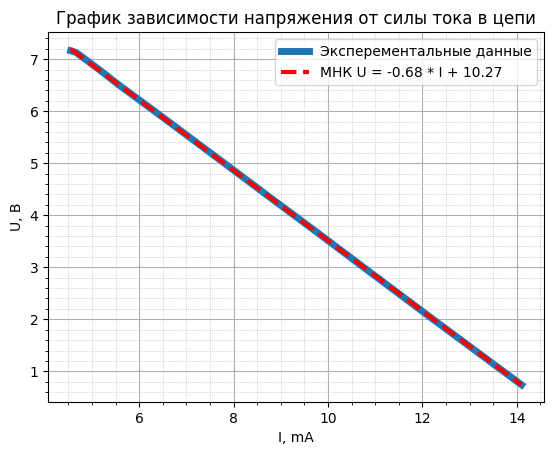

In [24]:
plt.plot(I, U, linewidth=5, label="Эксперементальные данные")

x = np.linspace(np.min(I), np.max(I))
plt.plot(x, x*b + a, "--r", linewidth=3, label=f"МНК U = {b.round(2)} * I + {a.round(2)} ")

plt.title("График зависимости напряжения от силы тока в цепи")
plt.xlabel("I, mA")
plt.ylabel("U, B")
plt.legend()
plt.minorticks_on()
plt.grid()
plt.grid(which='minor',  linestyle=':', linewidth=0.5)

## Мощности
Пункты 3-5

In [25]:
I

array([14.1 , 12.12, 10.84,  9.74,  8.73,  8.01,  7.33,  6.71,  6.28,
        5.92,  5.56,  5.25,  4.96,  4.66,  4.55])

In [27]:
P_R = U * I
P = eps * I
P_S = I**2 * r

dP_R = np.sqrt((2/3 * dI * U)**2 + (2/3 * dU * I)**2 )
dP_S = np.sqrt((2/3 * dI * 2 * I * r)**2 + (I**2 * dr)**2)
dP = np.sqrt((I * deps)**2 + (2/3 * dI * eps)**2)

fit = np.polyfit(I, P_R ,2)
line = np.poly1d(fit)
x = np.linspace(min(I), max(I))
# plt.plot(x, line(x), linewidth=2, label="КПД")
# plt.plot(I, P_R, linewidth=2, label="Полезная мощность P_R")

P_Rmax = max(line(x))
I_of_max = x[np.argmax(line(x))]

R_sogl = P_Rmax / I_of_max**2

dR_sogl = np.sqrt((dP_R[np.argmax(P_R)] / I_of_max**2)**2 + (2/3 * dI * 2 * P_Rmax / I_of_max**3)**2)



print(f"R_sogl = {R_sogl} * 10 ^ 3  \nr_vnutr = {r} * 10 ^3 ")
print(f"dR_sogl = {dR_sogl} * 10 ^ 3 ")
print(f"delta = {R_sogl-r} * 10 ^ 3 ")
print(f"delta / r_vnutr = {(R_sogl-r)/r}")

R_sogl = 0.6636301821588579 * 10 ^ 3  
r_vnutr = 0.6760902450431662 * 10 ^3 
dR_sogl = 0.0015446030686965461 * 10 ^ 3 
delta = -0.012460062884308232 * 10 ^ 3 
delta / r_vnutr = -0.01842958536328637


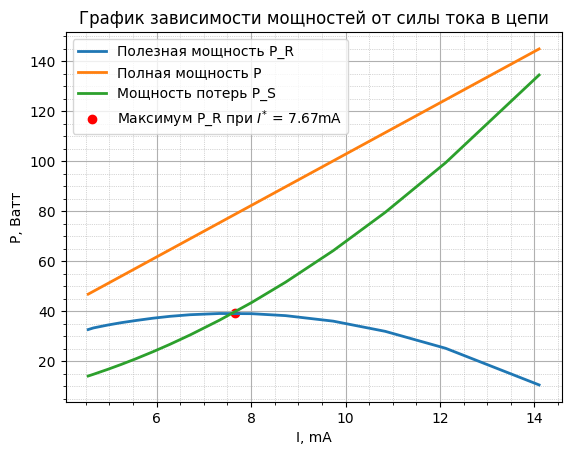

In [28]:
plt.plot(I, P_R, linewidth=2, label="Полезная мощность P_R")
plt.plot(I, P, linewidth=2, label="Полная мощность P")
plt.plot(I, P_S, linewidth=2, label="Мощность потерь P_S")
plt.scatter(I_of_max, P_Rmax, color="r", label="Максимум P_R при $I^{*}$ =" + f" {I_of_max.round(2)}mA")

plt.title("График зависимости мощностей от силы тока в цепи")
plt.xlabel("I, mA")
plt.ylabel("P, Ватт")
plt.legend()
plt.minorticks_on()
plt.grid()
plt.grid(which='minor',  linestyle=':', linewidth=0.5)




## КПД
пункты 6-7

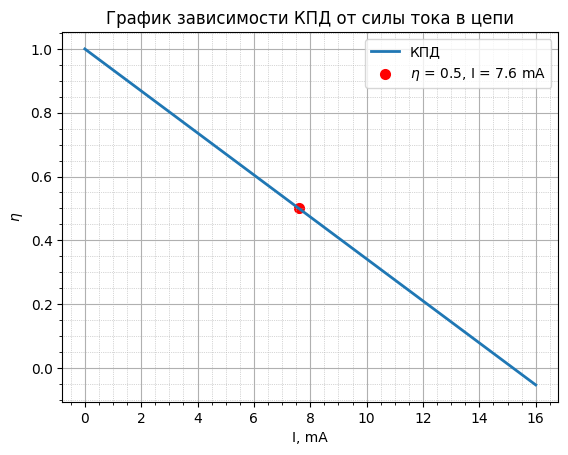

In [46]:
eta = P_R/P
deta = np.sqrt((1/eps * 2/3 * dU)**2 + (U / eps**2)**2)
fit = np.polyfit(I, eta ,1)
line = np.poly1d(fit)
x = np.linspace(0, 16, 100000)
plt.plot(x, line(x), linewidth=2, label="КПД")
for x_i in x:
    if line(x_i) - 0.5 < 0:
        plt.scatter(x_i, line(x_i), linewidth=2, color = 'r', label=f"$\eta$ = 0.5, I = {x_i.round(2)} mA")
        break

plt.title("График зависимости КПД от силы тока в цепи")
plt.xlabel("I, mA")
plt.ylabel("$\eta$")
plt.legend()
plt.minorticks_on()
plt.grid()
plt.grid(which='minor',  linestyle=':', linewidth=0.5)


##  Сохранение в файл всех новых данных

In [47]:
data["R"] = R
data["I, mA"] = I
data["U, В"] = U
data["Pr, мВт"] = P_R
data["dPr"] = dP_R
data["Ps, мВт"] = P_S
data["dPs"] = dP_S
data["P, мВт"] = P
data["dP"] = dP
data["eta"] = eta
data["deta"] = deta

data.to_excel(NAME_OF_EXCEL, index=False)
data

,R,"I, mA","U, В","Pr, мВт",dPr,"Ps, мВт",dPs,"P, мВт",dP,eta,deta
0,100,14.10,0.74,10.4340,0.047065,134.413502,0.217263,144.833430,0.124923,0.072041,0.007021
1,200,12.12,2.07,25.0884,0.040985,99.313871,0.162938,124.495118,0.108797,0.201521,0.019621
2,300,10.84,2.94,31.8696,0.037439,79.444390,0.132159,111.347119,0.098505,0.286218,0.027866
3,400,9.74,3.69,35.9406,0.034719,64.139059,0.108424,100.048057,0.089776,0.359233,0.034974
4,500,8.73,4.37,38.1501,0.032542,51.526798,0.088834,89.673464,0.081886,0.425434,0.041419
5,600,8.01,4.86,38.9286,0.031230,43.378018,0.076151,82.277714,0.076357,0.473137,0.046063
6,700,7.33,5.32,38.9956,0.030190,36.325585,0.065147,75.292840,0.071225,0.517919,0.050422
7,800,6.71,5.74,38.5154,0.029434,30.440355,0.055933,68.924277,0.066641,0.558807,0.054403
8,900,6.28,6.03,37.8684,0.029021,26.663918,0.049998,64.507371,0.063526,0.587040,0.057151
9,1000,5.92,6.27,37.1184,0.028744,23.694529,0.045314,60.809497,0.060965,0.610405,0.059426
